# Load database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [2]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
colaborador_agencia_path = os.getenv('COLABORADOR_AGENCIA_CSV')

In [3]:
# Carregar o CSV em um DataFrame Pandas
df_colaborador_agencia = pd.read_csv(colaborador_agencia_path)

# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df_colaborador_agencia.head()


,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1


**Análise inicial do Dataframe**

In [100]:
df_colaborador_agencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cod_colaborador  100 non-null    int64
 1   cod_agencia      100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [101]:
df_colaborador_agencia.describe()

,cod_colaborador,cod_agencia
count,100.000000,100.000000
mean,50.500000,4.990000
std,29.011492,3.016771
min,1.000000,1.000000
25%,25.750000,2.000000
50%,50.500000,5.000000
75%,75.250000,7.250000
max,100.000000,10.000000


**Verificar dados faltantes**

In [102]:
df_colaborador_agencia.isna().any()

cod_colaborador    False
cod_agencia        False
dtype: bool

Vamos selecionar somente os dados numéricos, pois nesta base de dados somente do tipo numérico.

In [103]:
df_colaborador_agencia.select_dtypes("int64").describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cod_colaborador,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
cod_agencia,100.0,4.99,3.016771,1.0,2.00,5.0,7.25,10.0


**Estatísticas básicas e contagens para entender melhor a relação entre colaboradores e agências**

In [107]:
# # Carregar o arquivo agencia.csv
df_agencia = pd.read_csv('agencias.csv')

In [108]:
# Mapear os códigos das agências para seus nomes correspondentes
df_agencia = df_agencia.set_index('cod_agencia')['nome'].to_dict()

# Substituir os códigos das agências por seus nomes no dataframe colaborador_agencia
df_colaborador_agencia['nome_agencia'] = df_colaborador_agencia['cod_agencia'].map(df_agencia)

# Contagem de colaboradores por agência
colab_count = df_colaborador_agencia['nome_agencia'].value_counts().sort_index()

# Exibir número total de colaboradores e número de agências únicas
num_colaboradores = df_colaborador_agencia['cod_colaborador'].nunique()
num_agencias = df_colaborador_agencia['cod_agencia'].nunique()

print(f"Número total de colaboradores: {num_colaboradores}")
print(f"Número total de agências: {num_agencias}")
print(f"Número médio de colaboradores por agência: {num_colaboradores / num_agencias:.2f}")

Número total de colaboradores: 100
Número total de agências: 10
Número médio de colaboradores por agência: 10.00


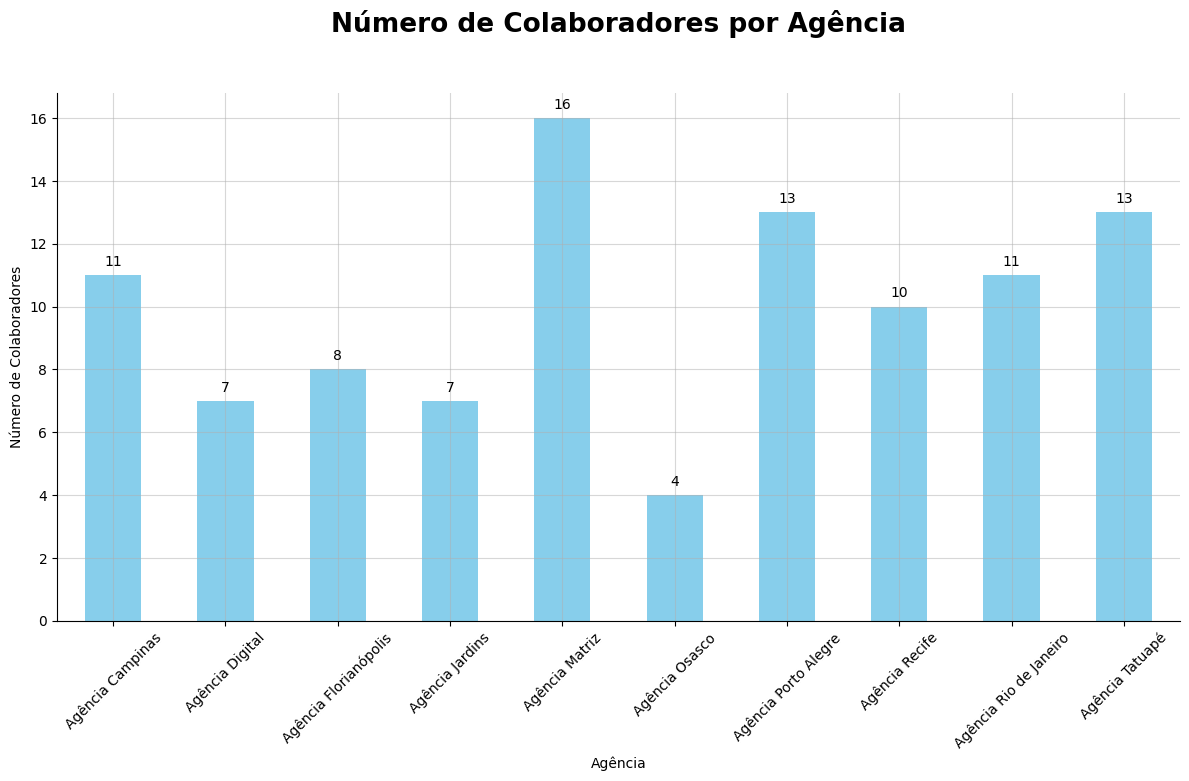

In [111]:
# Plotar gráfico de barras para contar colaboradores por agência (com nomes de agência no eixo x)
plt.figure(figsize=(12, 8))
bars = colab_count.plot(kind='bar', color='skyblue')

# Adicionar os valores de cada barra acima das barras correspondentes
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('Número de Colaboradores por Agência', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Agência')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Agência Matriz é a que tem mais colaboradores, e a Agência de Osasco é a que tem menos.